<a href="https://colab.research.google.com/github/teukumhfs/PremierLeague22-23_Analysis/blob/main/Premier_League_2022_23_Possession_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Premier League 2022/23 Possession Analysis



# Analysis
This analysis utilizes the mplsoccer, matplotlib, and pandas libraries to conduct a possession analysis of the Premier League for the 2022/23 season. It visualizes and analyzes the percentage of possession among the 20 teams, highlighting their defensive, midfield, and attacking tendencies. The project includes pitch statistics, heatmaps, and defines the minimum and maximum percentages for each phase. These insights enhance our understanding of club characteristics, uncovering team gameplay and tactics.

In [1]:
# @title Install mplsoccer library
!pip install mplsoccer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.1/68.1 kB 2.5 MB/s eta 0:00:00


In [2]:
# @title Import libraries
import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
import pandas as pd
from urllib.request import urlopen
from PIL import Image
from mplsoccer import Pitch, FontManager, add_image

In [3]:
# @title Get data from fbref.com
url = 'https://fbref.com/en/comps/9/Premier-League-Stats'
df = pd.read_html(url)[18]
print(df.head())

  Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
               Squad               # Pl               Poss                90s   
0            Arsenal                 26               59.3               38.0   
1        Aston Villa                 26               49.3               38.0   
2        Bournemouth                 31               40.4               38.0   
3          Brentford                 25               43.8               38.0   
4           Brighton                 29               60.2               38.0   

  Touches                                          ... Carries          \
  Touches Def Pen Def 3rd Mid 3rd Att 3rd Att Pen  ... Carries TotDist   
0   25909    1994    6632   11452    8015    1296  ...   15923   84011   
1   21501    2783    7912    9077    4706     746  ...   12294   65583   
2   19950    2934    8004    7933    4256     699  ...   10336   55322   
3   19750    2632    7290    7802    4835     827  ...   10408

In [4]:
# @title Select the DataFrame

# select subsets from table
df = df[['Unnamed: 0_level_0', 'Touches']].copy()
df.columns = df.columns.droplevel()

# remove unwanted index
df = df.drop(["Def Pen", "Att Pen", "Live"], axis = 1)

In [5]:
# @title Check the DataFrame
print(df.head())

         Squad  Touches  Def 3rd  Mid 3rd  Att 3rd
0      Arsenal    25909     6632    11452     8015
1  Aston Villa    21501     7912     9077     4706
2  Bournemouth    19950     8004     7933     4256
3    Brentford    19750     7290     7802     4835
4     Brighton    26727     7844    12212     6873


In [6]:
# @title Replace squad names in the DataFrame

# Replacing for naming optimization purpose
df['Squad'] = df['Squad'].replace({'Manchester Utd': 'Man United', 'Manchester City': 'Man City'})

In [7]:
# @title Recheck the DataFrame
print(df.head(20))

              Squad  Touches  Def 3rd  Mid 3rd  Att 3rd
0           Arsenal    25909     6632    11452     8015
1       Aston Villa    21501     7912     9077     4706
2       Bournemouth    19950     8004     7933     4256
3         Brentford    19750     7290     7802     4835
4          Brighton    26727     7844    12212     6873
5           Chelsea    27166     8461    12056     6850
6    Crystal Palace    21713     7668     9275     4991
7           Everton    20233     7219     8417     4830
8            Fulham    22160     7461     9519     5414
9      Leeds United    21642     6971     9290     5587
10   Leicester City    23125     8408    10293     4641
11        Liverpool    28399     8119    13329     7149
12         Man City    29895     7410    14372     8301
13       Man United    24847     8093    10389     6569
14    Newcastle Utd    22106     6757     9053     6516
15  Nott'ham Forest    17912     7420     6953     3755
16      Southampton    21095     7452     8998  

In [8]:
# @title Create touches_cols list to make total DataFrame and percentage
touches_cols = ['Def 3rd', 'Mid 3rd', 'Att 3rd']
# sum the list
df_total = pd.DataFrame(df[touches_cols].sum())
df_total.columns = ['total']
df_total = df_total.T
df_total = df_total.divide(df_total.sum(axis=1), axis=0) * 100

In [9]:
# @title Calculate the percentage, sorting by Att 3rd and Def 3rd
df[touches_cols] = df[touches_cols].divide(df[touches_cols].sum(axis=1), axis=0) * 100.
df.sort_values(['Att 3rd', 'Def 3rd'], ascending=[True, False], inplace=True)

In [10]:
# @title Import Premier League logo, define fontManager and path effects
SP_LOGO_URL = 'https://upload.wikimedia.org/wikipedia/en/thumb/f/f2/Premier_League_Logo.svg/1200px-Premier_League_Logo.svg.png'
sp_logo = Image.open(urlopen(SP_LOGO_URL))

# define FontManager
fm = FontManager()
# path effects
path_eff = [path_effects.Stroke(linewidth=3, foreground='white'),
            path_effects.Normal()]

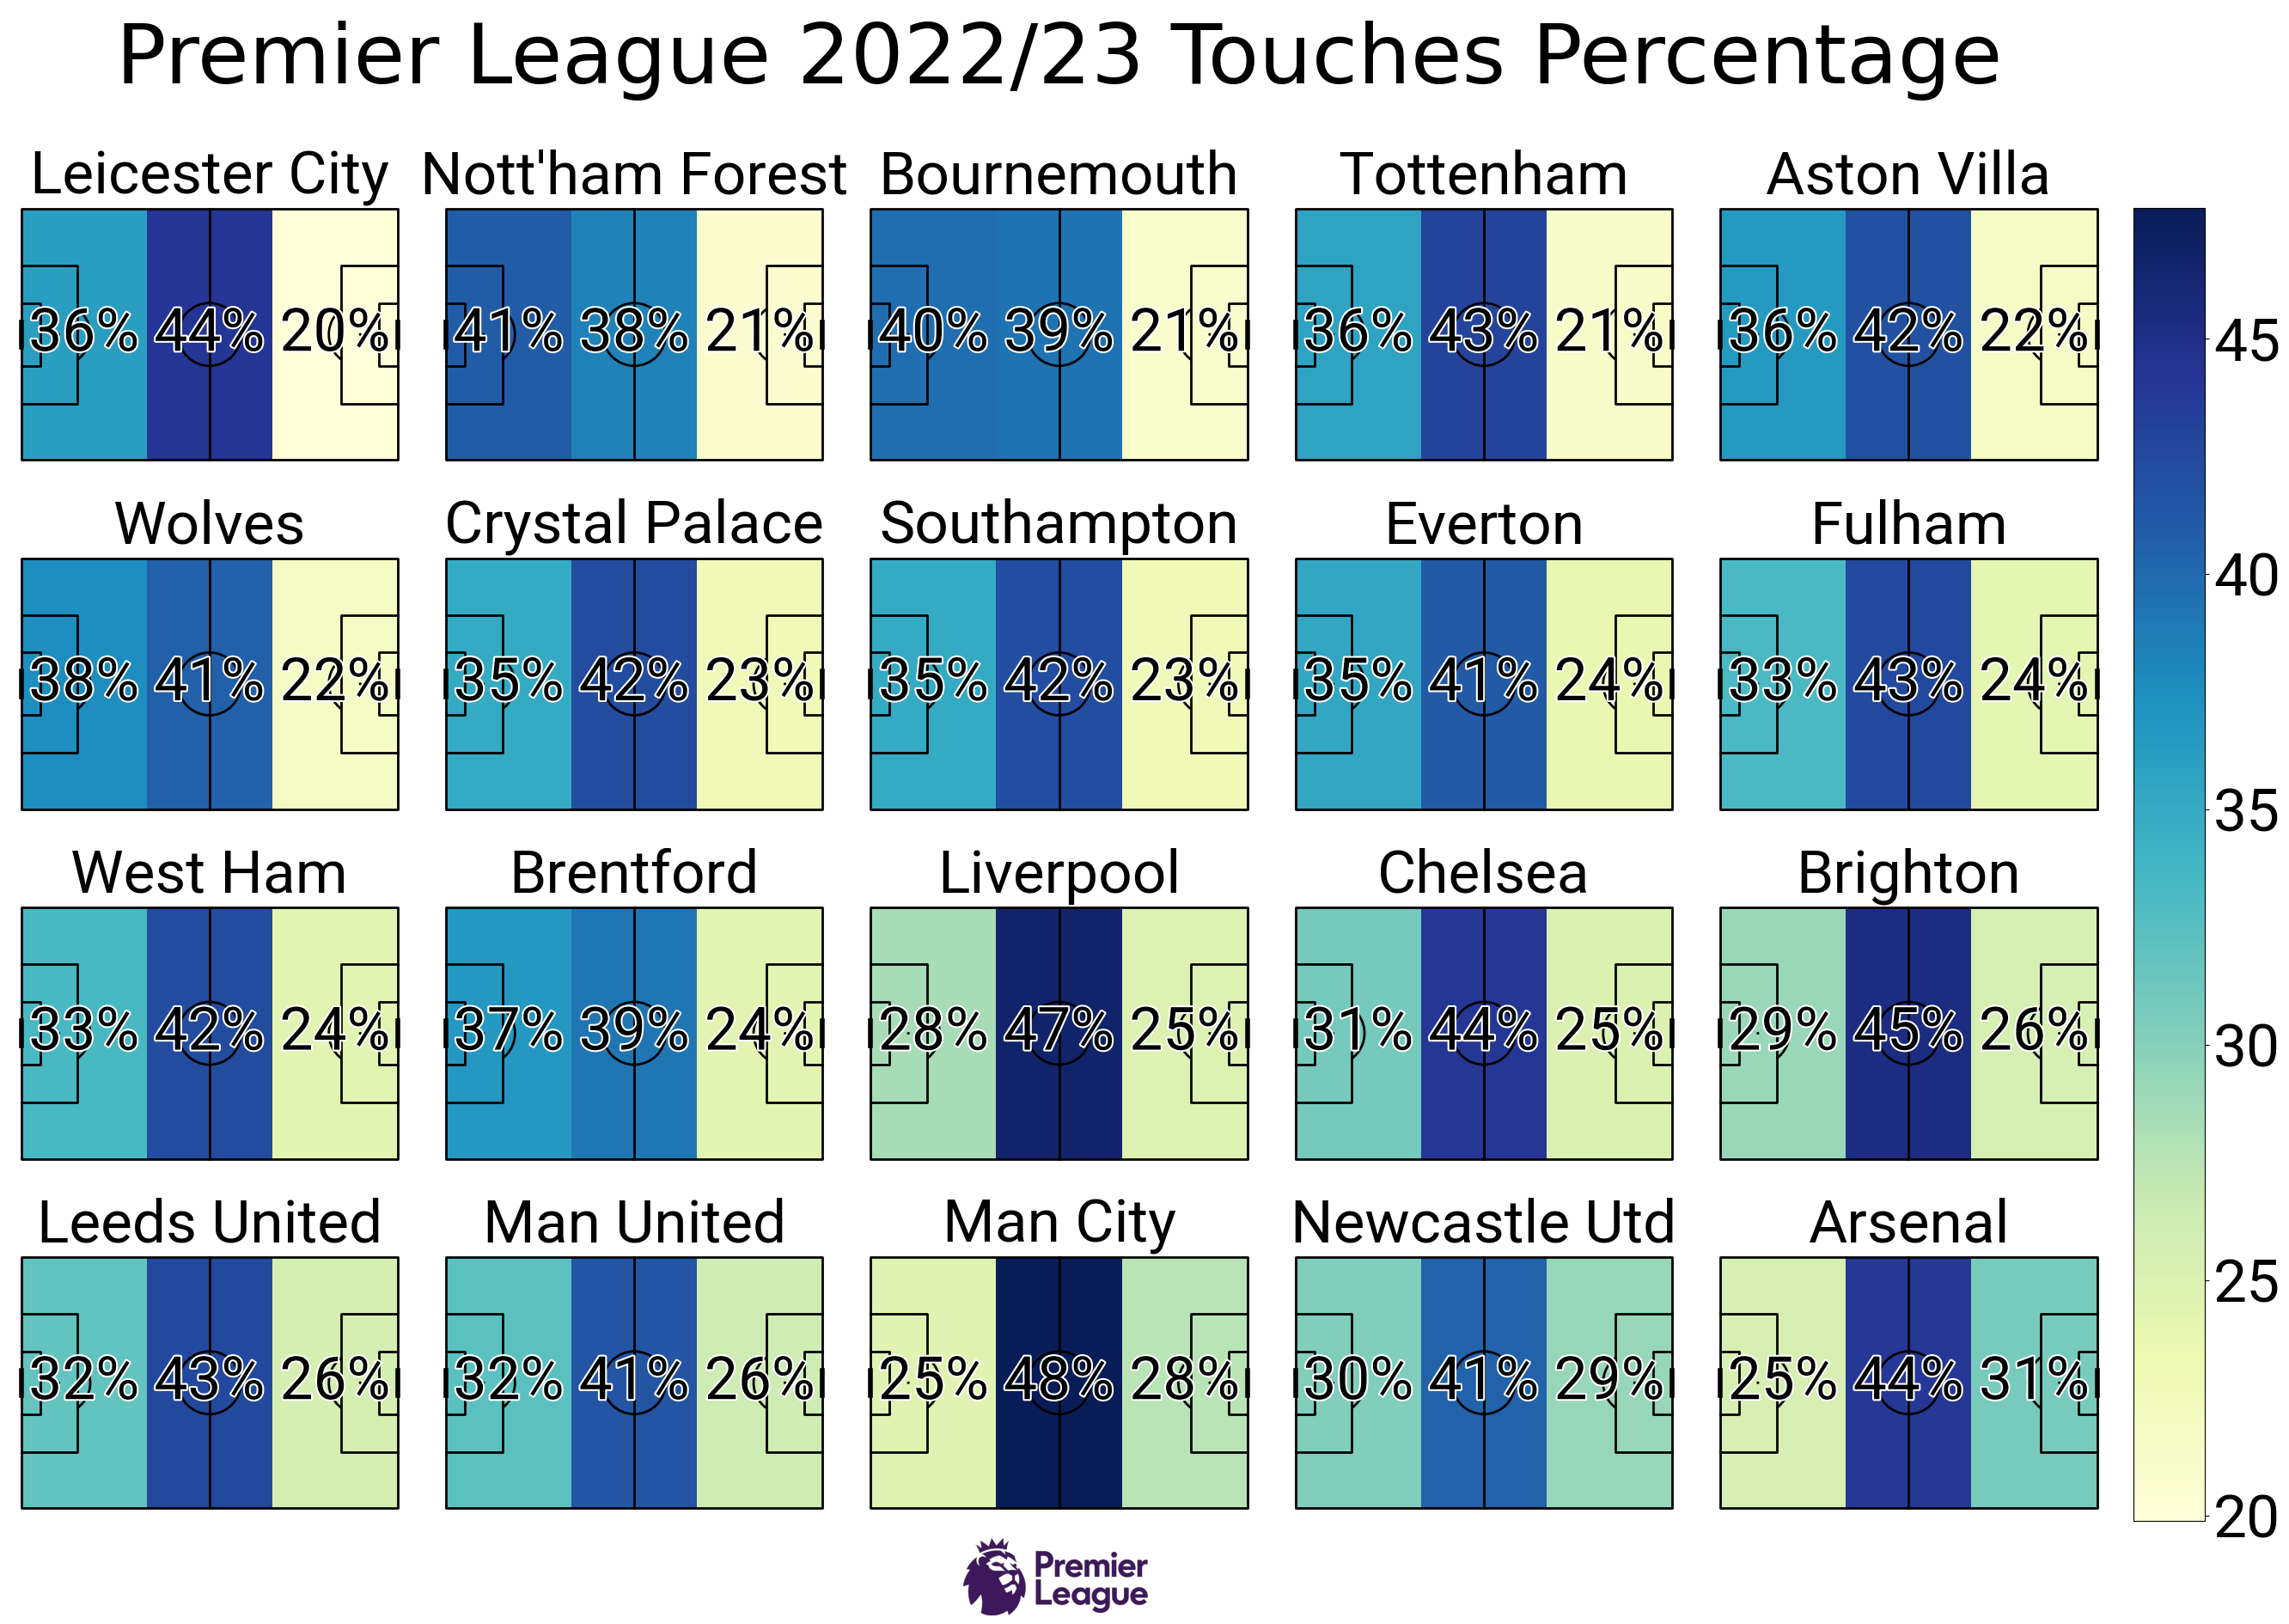

In [11]:
# @title Visualize pitch statistic with heatmap
# setting up the pitch
pitch = Pitch(line_zorder=2, line_color='black', pad_top=20)
bin_statistic = pitch.bin_statistic([0], [0], statistic='count', bins=(3, 1))

GRID_HEIGHT = 0.8
CBAR_WIDTH = 0.03
fig, axs = pitch.grid(nrows=4, ncols=5, figheight=20,
                      # space on the right hand side
                      grid_width=0.88, left=0.025,
                      endnote_height=0.03, endnote_space=0,
                      # Turn off the endnote/title axis.
                      axis=False,
                      title_space=0.02, title_height=0.06, grid_height=GRID_HEIGHT)
fig.set_facecolor('white')

teams = df['Squad'].values
# normalise the heatmaps with the min and max values
vmin = df[touches_cols].min().min()
vmax = df[touches_cols].max().max()
for i, ax in enumerate(axs['pitch'].flat[:len(teams)]):
    ax.text(60, -10, teams[i],
            ha='center', va='center', fontsize=50,
            fontproperties=fm.prop)

    # fill the bin
    bin_statistic['statistic'] = df.loc[df.Squad == teams[i], touches_cols].values
    heatmap = pitch.heatmap(bin_statistic, ax=ax, cmap='YlGnBu', vmin=vmin, vmax=vmax)
    annotate = pitch.label_heatmap(bin_statistic, color='black', fontproperties=fm.prop,
                                   path_effects=path_eff, fontsize=50, ax=ax,
                                   str_format='{0:.0f}%', ha='center', va='center')

# cbar axes
cbar_bottom = axs['pitch'][-1, 0].get_position().y0
cbar_left = axs['pitch'][0, -1].get_position().x1 + 0.01
ax_cbar = fig.add_axes((cbar_left, cbar_bottom, CBAR_WIDTH,
                        GRID_HEIGHT - 0.036))

cbar = plt.colorbar(heatmap, cax=ax_cbar)
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(fm.prop)
    label.set_fontsize(50)

# title and endnote
title = axs['title'].text(0.5, 0.5, 'Premier League 2022/23 Touches Percentage',
                          ha='center', va='center', fontsize=70)

logo = add_image(sp_logo, fig, left=0.425, bottom=0.02, height=0.045)

# Summary


In [12]:
# @title Result analysis

# Drop Touches column to take a look on a table result as the visualization above
df = df.drop('Touches', axis=1).copy()

In [15]:
# @title Highlight the minimum and maximum value on each column
def min_max_color(x):
    color = ['color: red' if v == x.min() else 'color: royalblue' if v == x.max() else '' for v in x]
    return color

df_highlight = df.round(0).style.apply(min_max_color, subset=['Def 3rd', 'Mid 3rd', 'Att 3rd'])

In [16]:
# @title Sort by Squad and display the table
df.sort_values('Squad', inplace=True)
display(df_highlight)

,Squad,Def 3rd,Mid 3rd,Att 3rd
0,Arsenal,25.000000,44.000000,31.000000
1,Aston Villa,36.000000,42.000000,22.000000
2,Bournemouth,40.000000,39.000000,21.000000
3,Brentford,37.000000,39.000000,24.000000
4,Brighton,29.000000,45.000000,26.000000
5,Chelsea,31.000000,44.000000,25.000000
6,Crystal Palace,35.000000,42.000000,23.000000
7,Everton,35.000000,41.000000,24.000000
8,Fulham,33.000000,43.000000,24.000000
9,Leeds United,32.000000,43.000000,26.000000


# Conclusion

Based on the result, it can be inferred:

*   **Nottingham Forest** displays a highly defensive performance in the league, boasting a defensive percentage of **41%**. In contrast, both **Arsenal and Manchester City** exhibit a relatively lower defensive percentage, each recording a defensive percentage of **25%**, indicating a preference for a less defensive style of play compared to other teams.
*   The league champions, **Manchester City**, demonstrate exceptional midfield dominance, leading with the highest midfield playing percentage of **48%**. Conversely, **Nottingham Forest** exhibits the lowest midfield playing percentage at **38%**.
*   **Arsenal** stands out as the most offensive team in the league, emphasizing an attacking style of play with a significant attacking percentage of **31%**. Conversely, Leicester City adopts a comparatively less offensive approach, registering an attacking percentage of **20%**.

These findings suggest that Nottingham favors a defensive playing style, Manchester City displays remarkable midfield control, showcasing their ability to dominate the middle of the pitch. Arsenal adopts an aggressive attacking style, while Leicester City exhibits relatively weaker offensive tactics compared to the other teams.